### March Madness 2020###

What to predict

Stage 1 - You should submit predicted probabilities for every possible matchup in the past 5 NCAA® tournaments (seasons 2015-2019).

Stage 2 - You should submit predicted probabilities for every possible matchup before the 2020 tournament begins.

Refer to the Timeline page for specific dates. In both stages, the sample submission will tell you which games to predict.

#### Data 1 : Basics####
Teams
Seasons
Tourney Seeds
Season Compact Results
TOurney Compact Results

#### Data 2 : Team Box Results####
Season Detailed Results
Tourney Detailed Results

#### Data 3 : Geography####
cities
gameCities

#### Data 4 : Public Rankings####
masseyOrdinals

#### Data 5 : Play by play####
Events (2015 -2019)

#### Data 6 : Supplements####
team Coaches
conferences
teamConferences
conference Tourney Games
Secondary Tourney Teams
Secondary Tourney Compact Results
Team Spellings
Tourney Slots
Tourney seed round slots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
datadir = './data2020'
stage1Dir = '/Stage1'
working_dir = datadir+stage1Dir

#--- STAGE -1
seasons_path = working_dir+'/MSeasons.csv'
teams_path = working_dir+'/MTeams.csv'
reg_season_compact_results_path = working_dir+'/MRegularSeasonCompactResults.csv'
reg_season_detailed_results_path = working_dir+'/MRegularSeasonDetailedResults.csv'
tourney_compact_results_path = working_dir+'/MNCAATourneyCompactResults.csv'
tourney_detailed_results_path = working_dir+'/MNCAATourneyDetailedResults.csv'
tourney_seeds_path = working_dir+'/MNCAATourneySeeds.csv'
tourney_slots_path = working_dir+'/MNCAATourneySlots.csv'


citiesPath = working_dir+'/Cities.csv'
conferencesPath = working_dir+'/Conferences.csv'
conferenceTourneyGamesPath = working_dir+'/MConferenceTourneyGames.csv'
gameCitiesPath = working_dir+'/MGameCities.csv'
masseyOrdinalsPath = working_dir+'/MMasseyOrdinals.csv'
tourneyseedRoundSlotsPath = working_dir+'/MNCAATourneySeedRoundSlots.csv'
secondaryTourneyCompactResults = working_dir+'/MSecondaryTourneyCompactResults.csv'
secondaryTourneyTeams = working_dir+'/MSecondaryTourneyTeams.csv'
teamCoachesPath = working_dir+'/MTeamCoaches.csv'
teamConferencesPath = working_dir+'/MTeamConferences.csv'
teamSpellingsPath = working_dir+'/MTeamSpellings.csv'

events2015Path = datadir+'/MEvents2015.csv'
events2016Path = datadir+'/MEvents2016.csv'
events2017Path = datadir+'/MEvents2017.csv'
events2018Path = datadir+'/MEvents2018.csv'
events2019Path = datadir+'/MEvents2019.csv'
playersPath = datadir+'/Mplayers.csv'

In [6]:
seasons_df = pd.read_csv(seasons_path)
teams_df = pd.read_csv(teams_path)
RSCR_df = pd.read_csv(reg_season_compact_results_path)
RSDR_df = pd.read_csv(reg_season_detailed_results_path)
tcr_df = pd.read_csv(tourney_compact_results_path)
tdr_df = pd.read_csv(tourney_detailed_results_path)
tseeds_df = pd.read_csv(tourney_seeds_path)
tslots_df = pd.read_csv(tourney_slots_path)

In [7]:
#--- 2020 details
citiesDF = pd.read_csv(citiesPath)
conferencesDF = pd.read_csv(conferencesPath)
confTourneyGamesDF = pd.read_csv(conferenceTourneyGamesPath)
gameCitiesDF = pd.read_csv(gameCitiesPath)
MOrdDF = pd.read_csv(masseyOrdinalsPath)
tourSeedRoundsDF = pd.read_csv(tourneyseedRoundSlotsPath)

#--- events
e2015 = pd.read_csv(events2015Path)
e2016 = pd.read_csv(events2016Path)
e2017 = pd.read_csv(events2017Path)
e2018 = pd.read_csv(events2018Path)
e2019 = pd.read_csv(events2019Path)

#--- Secondary tourney
teams2DF = pd.read_csv(secondaryTourneyTeams)
TCR2DF = pd.read_csv(secondaryTourneyCompactResults)

#---Team Related
playersDF = pd.read_csv(playersPath) #--- total players : 13338
coachesDF = pd.read_csv(teamCoachesPath)#--- total : 11348
teamConfDF = pd.read_csv(teamConferencesPath)#--- confDetails

In [8]:
teamSpellings = pd.read_csv(teamSpellingsPath, encoding='cp437')#--- 1143


In [9]:
#--- teams with first and last season in a year
teams_df[(teams_df['FirstD1Season'] == 1985) & (teams_df['LastD1Season'] == 2020)]

,TeamID,TeamName,FirstD1Season,LastD1Season
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
5,1106,Alabama St,1985,2020
7,1108,Alcorn St,1985,2020
...,...,...,...,...
357,1458,Wisconsin,1985,2020
360,1461,Wyoming,1985,2020
361,1462,Xavier,1985,2020
362,1463,Yale,1985,2020


In [10]:
teamConfDF.head()
#len(teamConfDF)

,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac


In [11]:
teamSpellings.head()


,TeamNameSpelling,TeamID
0,a&m-corpus chris,1394
1,a&m-corpus christi,1394
2,abilene chr,1101
3,abilene christian,1101
4,abilene-christian,1101


In [12]:
e2015.head()


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0


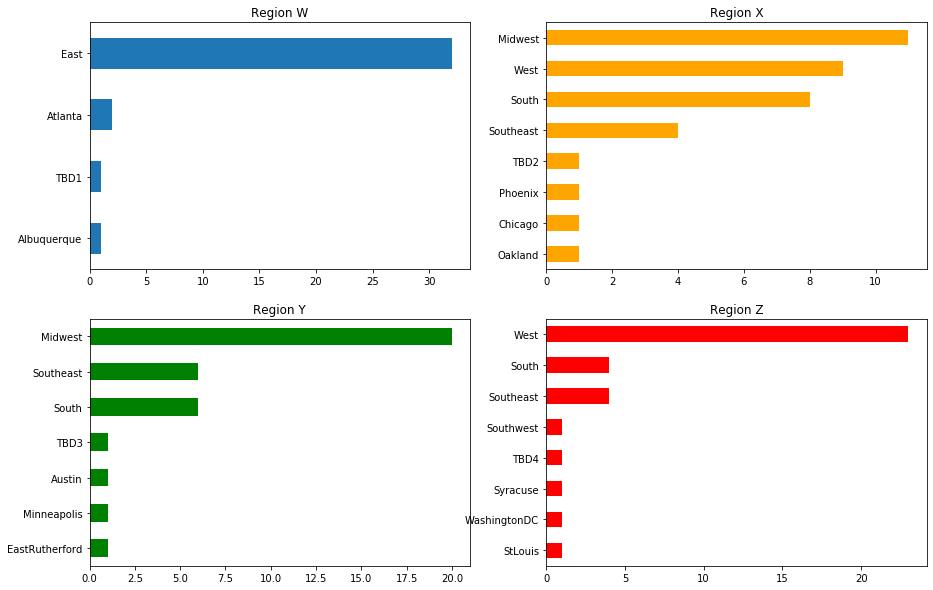

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
seasons_df['RegionW'].value_counts().sort_values().plot(kind='barh', title='Region W', ax=axs[0,0])
seasons_df['RegionX'].value_counts().sort_values().plot(kind='barh', title='Region X', ax=axs[0,1],color='Orange')
seasons_df['RegionY'].value_counts().sort_values().plot(kind='barh', title='Region Y', ax=axs[1,0],color='Green')
seasons_df['RegionZ'].value_counts().sort_values().plot(kind='barh', title='Region Z', ax=axs[1,1],color='Red')
plt.show()


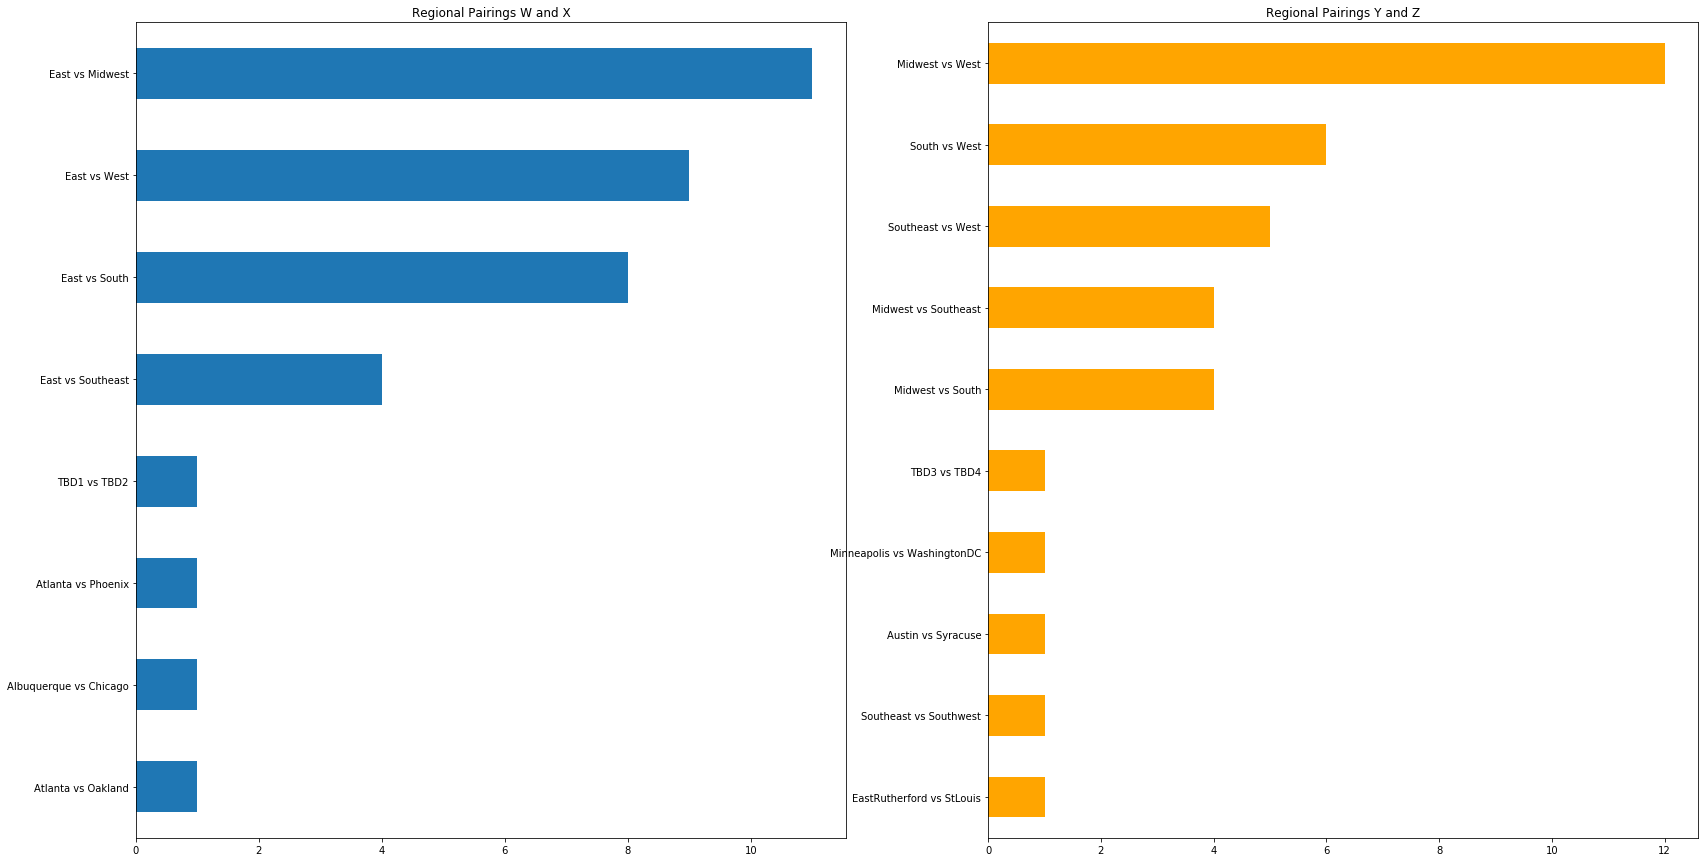

In [14]:
#--- most frequent regional Pairings
fig, axs = plt.subplots(1, 2, figsize=(28,15))
pairingsDF = seasons_df.copy()
pairingsDF['W vs X'] = seasons_df['RegionW'] + ' vs ' + seasons_df['RegionX']
pairingsDF['Y vs Z'] = seasons_df['RegionY'] + ' vs ' + seasons_df['RegionZ']
pairingsDF = pairingsDF[['Season','W vs X','Y vs Z']]
pairingsDF['W vs X'].value_counts().sort_values().plot(kind='barh',title='Regional Pairings W and X',ax=axs[0])
pairingsDF['Y vs Z'].value_counts().sort_values().plot(kind='barh',title='Regional Pairings Y and Z',ax=axs[1], color='orange')
plt.show()

In [15]:
RSCR_df = RSCR_df.merge(teams_df[['TeamName','TeamID']],
                       left_on = 'WTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'WTeamName'}).merge(teams_df[['TeamName','TeamID']],
                       left_on = 'LTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'LTeamName'})
#RSCR_df.head()

Final day of season :  132


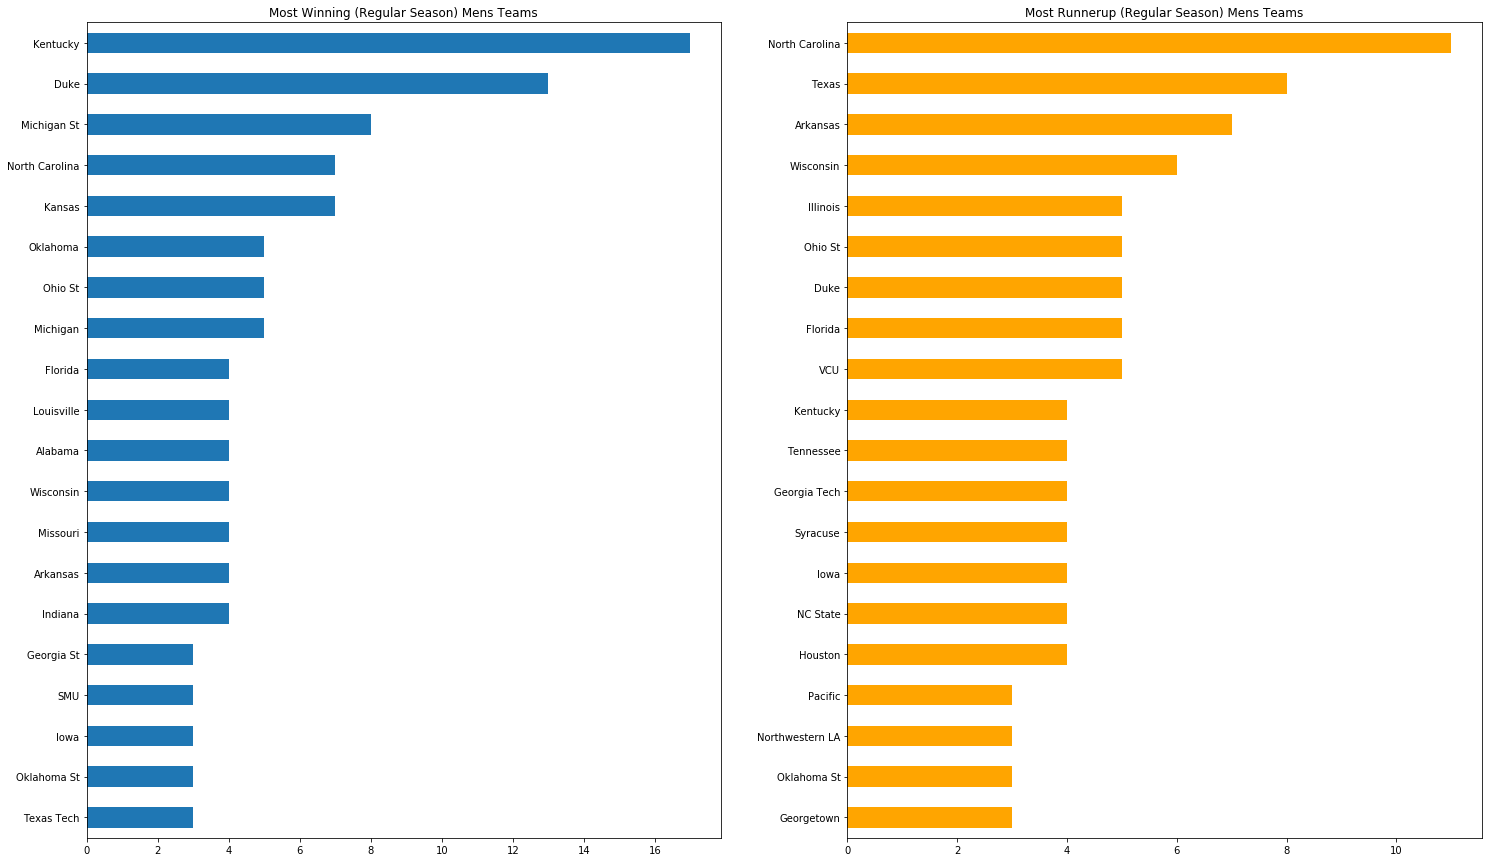

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(25,15))
max_day = max(RSCR_df['DayNum'])
print('Final day of season : ',max_day)
season_finale_df = RSCR_df[RSCR_df['DayNum'] ==  max_day]
season_finale_df['WTeamName'].value_counts().sort_values().tail(20).plot(kind='barh',title='Most Winning (Regular Season) Mens Teams',ax=axs[0])
season_finale_df['LTeamName'].value_counts().sort_values().tail(20).plot(kind='barh',title='Most Runnerup (Regular Season) Mens Teams',ax=axs[1],color='orange')
plt.show()

In [17]:
tcr_df = tcr_df.merge(teams_df[['TeamName','TeamID']],
                       left_on = 'WTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'WTeamName'}).merge(teams_df[['TeamName','TeamID']],
                       left_on = 'LTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'LTeamName'})
#tcr_df.head()

Final day of Tournament :  154


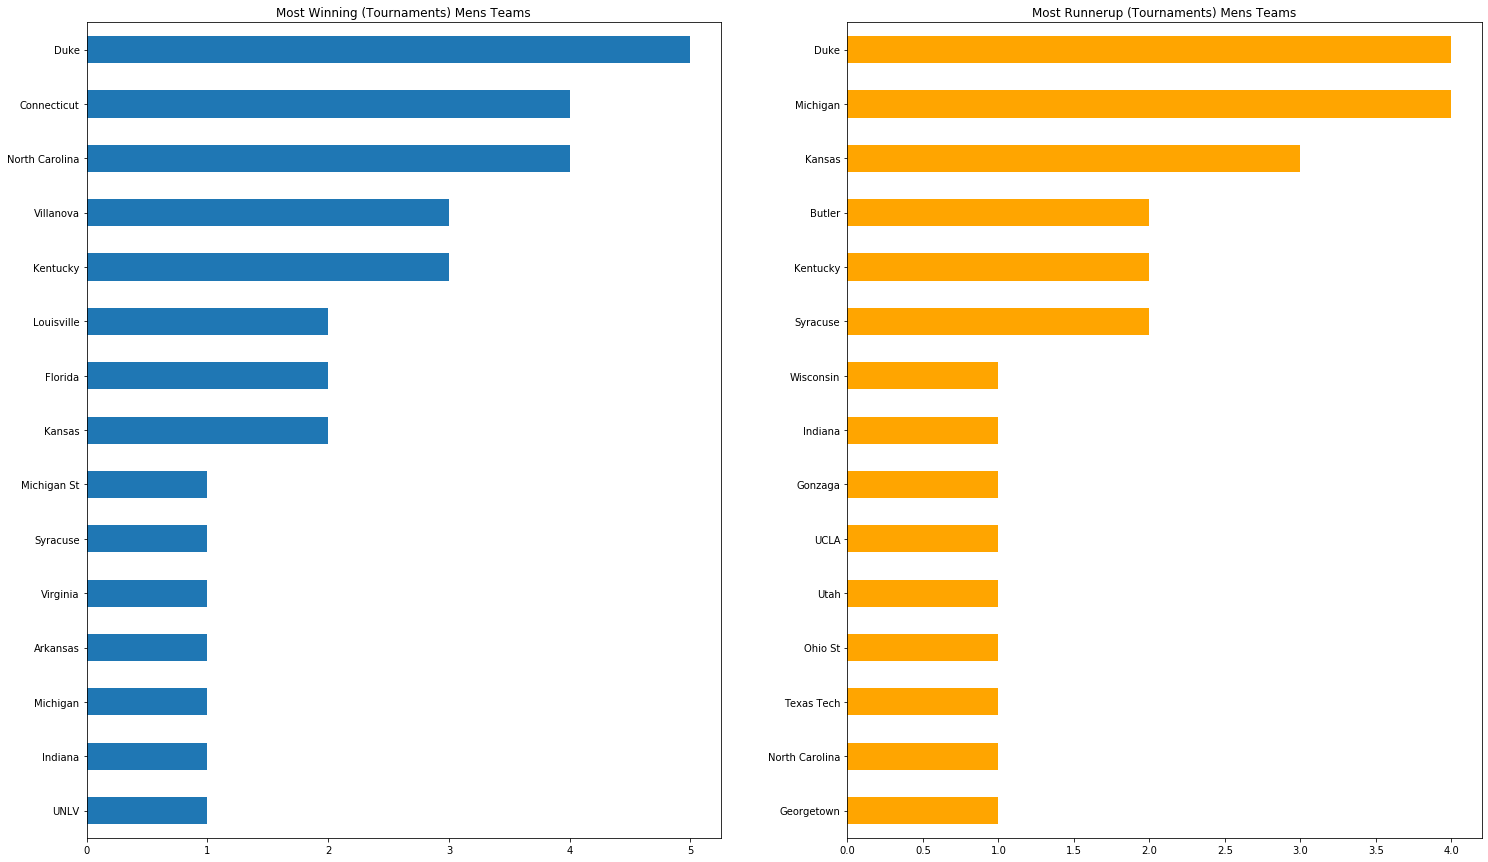

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(25,15))
max_day = max(tcr_df['DayNum'])
print('Final day of Tournament : ',max_day)
t_finale_df = tcr_df[tcr_df['DayNum'] ==  max_day]
t_finale_df['WTeamName'].value_counts().sort_values().tail(15).plot(kind='barh',title='Most Winning (Tournaments) Mens Teams',ax=axs[0])
t_finale_df['LTeamName'].value_counts().sort_values().tail(15).plot(kind='barh',title='Most Runnerup (Tournaments) Mens Teams',ax=axs[1],color='orange')
plt.show()

In [19]:
def getSeed(season, teamId):
    return tseeds_df[(tseeds_df['Season'] == season) & (tseeds_df['TeamID'] == teamId)]['Seed'].str[1:3].apply(pd.to_numeric).values[0]

In [20]:
t_finale_df['Wseed'] = np.vectorize(getSeed)(t_finale_df['Season'], t_finale_df['WTeamID'])
t_finale_df['Lseed'] = np.vectorize(getSeed)(t_finale_df['Season'], t_finale_df['LTeamID'])
t_finale_df.head()

C:\Users\sbotsa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sbotsa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Wseed,Lseed
56,2016,154,1437,77,1314,74,N,0,Villanova,North Carolina,2,1
176,1985,154,1437,66,1207,64,N,0,Villanova,Georgetown,8,1
205,1993,154,1314,77,1276,71,N,0,North Carolina,Michigan,1,1
208,1992,154,1181,71,1276,51,N,0,Duke,Michigan,1,6
211,2018,154,1437,79,1276,62,N,0,Villanova,Michigan,1,3


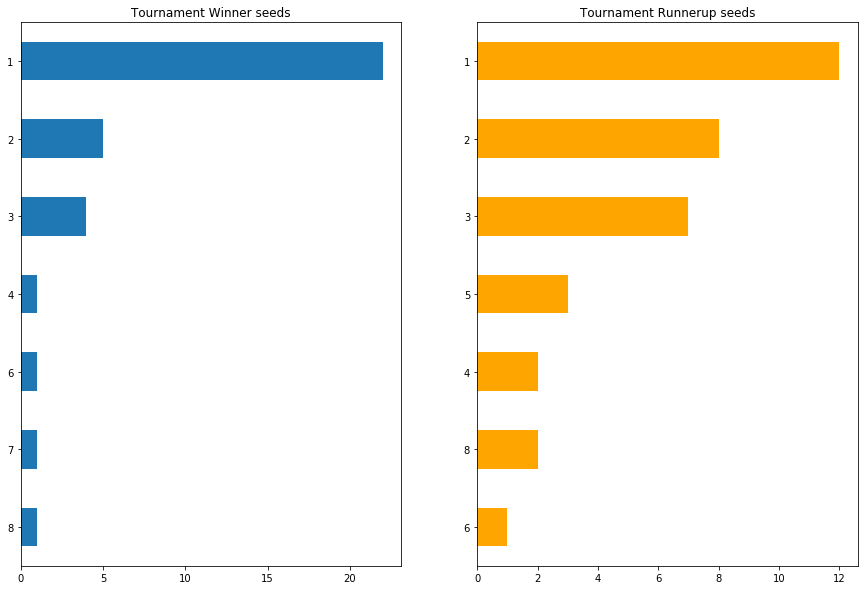

In [21]:
#--- title winner seeds
fig, axs = plt.subplots(1, 2, figsize=(15,10))
t_finale_df['Wseed'].value_counts().sort_values().plot(kind='barh',title='Tournament Winner seeds',ax=axs[0])
t_finale_df['Lseed'].value_counts().sort_values().plot(kind='barh',title='Tournament Runnerup seeds',ax=axs[1],color='orange')
plt.show()

In [22]:
#--- seed performance in every round of the tournament
tcr_df['Wseed'] = np.vectorize(getSeed)(tcr_df['Season'], tcr_df['WTeamID'])
tcr_df['Lseed'] = np.vectorize(getSeed)(tcr_df['Season'], tcr_df['LTeamID'])
tcr_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Wseed,Lseed
0,1985,136,1116,63,1234,54,N,0,Arkansas,Iowa,9,8
1,1997,138,1246,75,1234,69,N,0,Kentucky,Iowa,1,8
2,2001,138,1246,92,1234,79,N,0,Kentucky,Iowa,2,7
3,1987,146,1424,84,1234,81,N,0,UNLV,Iowa,1,2
4,1991,138,1181,85,1234,70,N,0,Duke,Iowa,2,7


In [23]:
tslots_df

,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12
...,...,...,...,...
2246,2019,R6CH,R5WX,R5YZ
2247,2019,W11,W11a,W11b
2248,2019,W16,W16a,W16b
2249,2019,X11,X11a,X11b


### Public Rankings###


**Validate for top team - 1438**


In [25]:
teams_df[teams_df.TeamID == 1438].TeamName.values[0]


'Virginia'

C:\Users\sbotsa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<Figure size 1080x720 with 0 Axes>

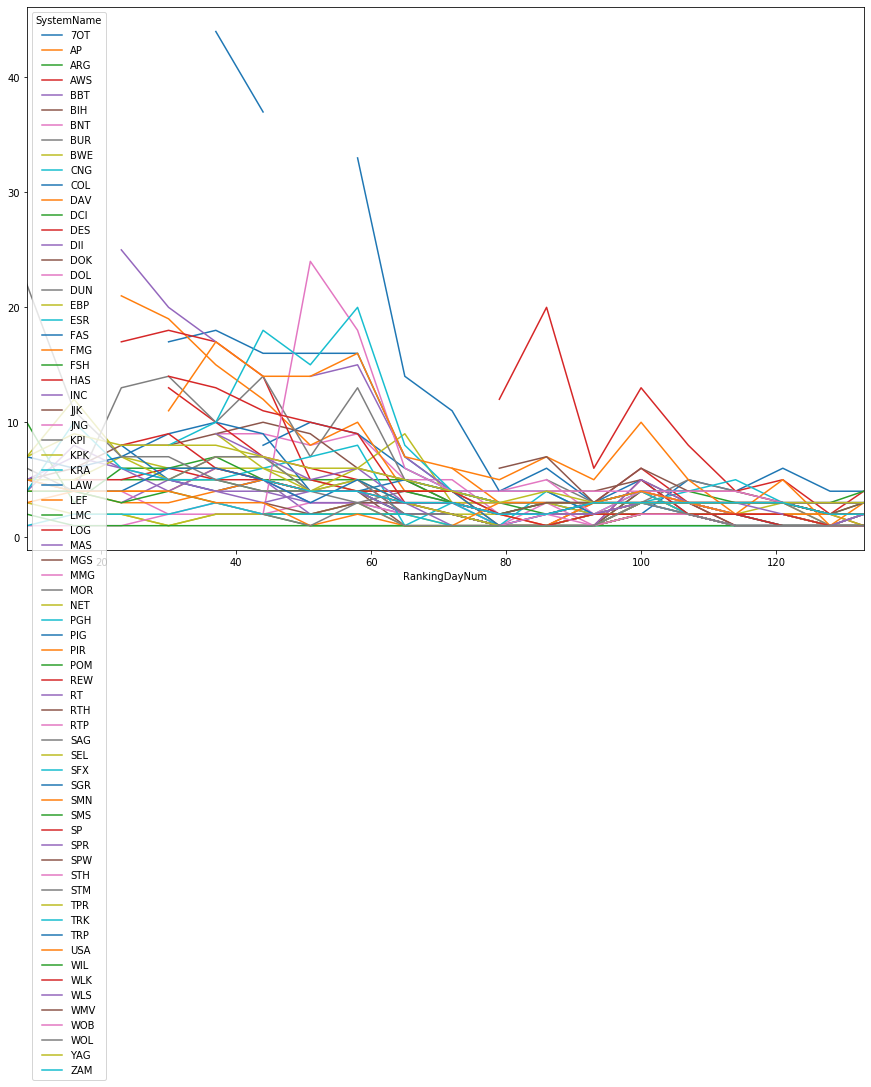

In [26]:
#MOrdDF.Season.unique() --- usinque seasons - 2003 - 2019
#MOrdDF.TeamID.unique() --- 357 teams
#MOrdDF.SystemName.unique() #--- 174 selection systems
plt.figure(figsize=(15,10))
winningTeamID = 1438
tourneyYear = 2019
MOrdDF[(MOrdDF.Season == tourneyYear) & (MOrdDF.TeamID == winningTeamID)]#head()
MOrdDF_winner_2019 = MOrdDF[(MOrdDF.Season == tourneyYear) & (MOrdDF.TeamID == winningTeamID)]
MOrdDF_winner_2019['TeamName'] = teams_df[teams_df.TeamID == winningTeamID].TeamName.values[0]
MOrdDF_winner_2019.head()
#MOrdDF_winner_2019.groupby('SystemName')
#---,figsize=(15,10)
MOrdDF_winner_Sel_2019 = pd.DataFrame.pivot(MOrdDF_winner_2019,index='RankingDayNum',columns='SystemName',values='OrdinalRank')
MOrdDF_winner_Sel_2019.plot(figsize=(15,10))

In [29]:
assert all(tdr_df.columns == RSDR_df.columns)

In [30]:
RSDR_df[RSDR_df['Season'] == 2019]


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
82041,2019,1,1104,82,1380,62,H,0,27,55,...,17,17,30,11,20,8,15,7,2,28
82042,2019,1,1113,102,1168,94,H,0,33,78,...,24,19,26,7,35,7,17,7,3,36
82043,2019,1,1119,73,1265,69,H,0,22,51,...,15,12,24,9,27,8,12,4,0,23
82044,2019,1,1120,101,1375,58,H,0,38,74,...,22,17,22,8,19,9,22,4,5,17
82045,2019,1,1123,86,1232,69,H,0,32,65,...,12,11,18,18,20,11,11,6,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87499,2019,132,1153,69,1222,57,N,0,22,50,...,33,11,18,17,16,8,7,2,4,19
87500,2019,132,1209,73,1426,64,N,0,20,50,...,33,11,17,13,28,12,14,5,2,24
87501,2019,132,1277,65,1276,60,N,0,22,55,...,25,10,12,3,26,17,6,5,5,11
87502,2019,132,1387,55,1382,53,N,0,22,59,...,19,8,10,13,30,9,11,2,7,16


In [31]:
tdr_df[(tdr_df['Season'] == 2019)]
#- & ((tdr_df['WTeamID'] == 1437) | (tdr_df['LTeamID'] == 1437))

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
1048,2019,134,1125,81,1396,70,N,0,28,53,...,22,7,13,15,24,13,11,7,1,22
1049,2019,134,1192,82,1341,76,N,0,30,55,...,28,5,7,10,17,17,12,9,1,19
1050,2019,135,1113,74,1385,65,N,0,22,49,...,31,13,23,16,27,9,16,11,1,22
1051,2019,135,1295,78,1300,74,N,0,25,52,...,21,17,21,15,23,17,9,0,2,20
1052,2019,136,1120,78,1308,77,N,0,26,57,...,25,20,27,11,28,14,16,6,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,146,1120,77,1246,71,N,1,26,65,...,21,12,21,11,30,14,14,5,5,19
1111,2019,146,1277,68,1181,67,N,0,30,70,...,21,8,13,13,29,14,17,4,9,9
1112,2019,152,1403,61,1277,51,N,0,22,51,...,24,14,18,8,28,6,11,1,2,15
1113,2019,152,1438,63,1120,62,N,0,25,51,...,31,11,14,9,24,9,5,3,3,12


In [33]:
tour_data = tdr_df.copy()
tour_data['id'] = tdr_df['Season'] + tdr_df

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [34]:
tseeds_df

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2281,2019,Z12,1332
2282,2019,Z13,1414
2283,2019,Z14,1330
2284,2019,Z15,1159


In [35]:
#--- generate Possible matchups for every year starting from 2015 - 2019
prediction_year = 2019
print('--> creating possible matchups for year',prediction_year,'...')
tourney_teams = []
for index, row in tseeds_df.iterrows():
    if row['Season'] == prediction_year:
        tourney_teams.append(row['TeamID'])
#tourney_teams
tourney_teams.sort()
tourney_ids = []
for team_1 in tourney_teams:
    for team_2 in tourney_teams:
        if team_1 < team_2:
            #--- predict winner function that returns probabilities
            label = str(prediction_year) + '_' + str(team_1) + '_' + str(team_2)
            tourney_ids.append(label)
len(tourney_ids)

--> creating possible matchups for year 2019 ...


2278

In [36]:
#--- get number of tourney appearances 
winningTeamID = 1438
def getTourneyAppearances(team_id):
    return len(tseeds_df[tseeds_df['TeamID'] == team_id].index)

In [37]:
print('For virginia no of tournament appearnaces : ',getTourneyAppearances(winningTeamID)) #--1438


For virginia no of tournament appearnaces :  18


In [38]:
#--- get season related features
TDF = RSDR_df[(RSDR_df.WTeamID == winningTeamID) | (RSDR_df.LTeamID == winningTeamID)]
gamesWon = TDF[TDF.WTeamID == winningTeamID].DayNum.count()
gamesLost = TDF[TDF.LTeamID == winningTeamID].DayNum.count()
totalFGM = TDF[(TDF.WTeamID == winningTeamID)].WFGM.sum() + TDF[(TDF.LTeamID == winningTeamID)].LFGM.sum()
totalFGA = TDF[(TDF.WTeamID == winningTeamID)].WFGA.sum() + TDF[(TDF.LTeamID == winningTeamID)].LFGA.sum()
totalFGM3 = TDF[(TDF.WTeamID == winningTeamID)].WFGM3.sum() + TDF[(TDF.LTeamID == winningTeamID)].LFGM3.sum()
totalFGA3 = TDF[(TDF.WTeamID == winningTeamID)].WFGA3.sum() + TDF[(TDF.LTeamID == winningTeamID)].LFGA3.sum()
totalFTM = TDF[(TDF.WTeamID == winningTeamID)].WFTM.sum() + TDF[(TDF.LTeamID == winningTeamID)].LFTM.sum()
totalFTA = TDF[(TDF.WTeamID == winningTeamID)].WFTA.sum() + TDF[(TDF.LTeamID == winningTeamID)].LFTA.sum()
totalOR = TDF[(TDF.WTeamID == winningTeamID)].WOR.sum() + TDF[(TDF.LTeamID == winningTeamID)].LOR.sum()
totalDR = TDF[(TDF.WTeamID == winningTeamID)].WDR.sum() + TDF[(TDF.LTeamID == winningTeamID)].LDR.sum()
totalAST = TDF[(TDF.WTeamID == winningTeamID)].WAst.sum() + TDF[(TDF.LTeamID == winningTeamID)].LAst.sum()
totalTO = TDF[(TDF.WTeamID == winningTeamID)].WTO.sum() + TDF[(TDF.LTeamID == winningTeamID)].LTO.sum()
totalSTL = TDF[(TDF.WTeamID == winningTeamID)].WStl.sum() + TDF[(TDF.LTeamID == winningTeamID)].LStl.sum()
totalBLK = TDF[(TDF.WTeamID == winningTeamID)].WBlk.sum() + TDF[(TDF.LTeamID == winningTeamID)].LBlk.sum()
totalPF = TDF[(TDF.WTeamID == winningTeamID)].WPF.sum() + TDF[(TDF.LTeamID == winningTeamID)].LPF.sum()
seasonFeatures = [gamesWon, gamesLost, totalFGM, totalFGA, totalFGM3, totalFGA3, totalFTM, totalFTA, totalOR, totalDR, totalAST, totalTO, totalSTL, 
                  totalBLK, totalPF, getTourneyAppearances(winningTeamID)]
seasonFeatures

[343,
 181,
 12876,
 28854,
 3439,
 9398,
 6976,
 9744,
 5568,
 12724,
 6946,
 6142,
 3101,
 1855,
 8988,
 18]

In [39]:
tcr_df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Wseed,Lseed
0,1985,136,1116,63,1234,54,N,0,Arkansas,Iowa,9,8
1,1997,138,1246,75,1234,69,N,0,Kentucky,Iowa,1,8
2,2001,138,1246,92,1234,79,N,0,Kentucky,Iowa,2,7
3,1987,146,1424,84,1234,81,N,0,UNLV,Iowa,1,2
4,1991,138,1181,85,1234,70,N,0,Duke,Iowa,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,2017,138,1211,79,1321,73,N,0,Gonzaga,Northwestern,1,8
2247,2005,134,1324,79,1105,69,N,0,Oakland,Alabama A&M,16,16
2248,2014,137,1455,64,1142,37,N,0,Wichita St,Cal Poly,1,16
2249,2011,136,1361,68,1294,50,N,0,San Diego St,N Colorado,2,15
